In [1]:
#project1
import pandas as pd
import numpy as np

data = {
    "Product": ["Laptop", "Mouse", "Chair", "Phone", "Pen"] * 20,
    "Region": np.random.choice(["North", "South", "East", "West"], 100),
    "Sales": np.random.randint(100, 2000, 100),
    "Profit": np.random.randint(-200, 800, 100),
    "Discount": np.random.uniform(0.0, 0.5, 100).round(2),
    "Category": np.random.choice(["Technology", "Office Supplies", "Furniture"], 100),
    "Date": pd.date_range(start="2023-01-01", periods=100)
}

df = pd.DataFrame(data)
print(df.head())

  Product Region  Sales  Profit  Discount    Category       Date
0  Laptop  South   1012      56      0.00   Furniture 2023-01-01
1   Mouse  South    980     355      0.22   Furniture 2023-01-02
2   Chair  South   1735     190      0.05   Furniture 2023-01-03
3   Phone   West    930     -15      0.43   Furniture 2023-01-04
4     Pen  North   1509     -15      0.26  Technology 2023-01-05


In [3]:
#Handle Missing Values
df.isnull().sum()  # Check
df['Sales'] = df['Sales'].fillna(df['Sales'].mean())
df['Profit'] = df['Profit'].fillna(df['Profit'].median())

In [4]:
# Remove Duplicates
df.drop_duplicates(inplace=True)

In [5]:
#Detect & Handle Outliers
#Using IQR Method:

# Select the column to check for outliers
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier condition
outlier_condition = (df['Sales'] < Q1 - 1.5 * IQR) | (df['Sales'] > Q3 + 1.5 * IQR)

# Show outliers
outliers_iqr = df[outlier_condition]
print("Outliers using IQR:\n", outliers_iqr)

# Remove outliers
df_iqr_cleaned = df[~outlier_condition]

Outliers using IQR:
 Empty DataFrame
Columns: [Product, Region, Sales, Profit, Discount, Category, Date]
Index: []


In [6]:
#Z-score Method
from scipy.stats import zscore
import numpy as np

# Compute z-scores for numeric columns
z_scores = np.abs(zscore(df[['Sales', 'Profit']]))  # only numeric

# Set condition: keep only rows where all z-scores < 3
outlier_condition = (z_scores > 3).any(axis=1)

# Show outliers
outliers_zscore = df[outlier_condition]
print("Outliers using Z-score:\n", outliers_zscore)

# Remove them
df_zscore_cleaned = df[~outlier_condition]

Outliers using Z-score:
 Empty DataFrame
Columns: [Product, Region, Sales, Profit, Discount, Category, Date]
Index: []


In [7]:
#Statistical Analysis
print(df[['Sales', 'Profit', 'Discount']].describe())
print(df[['Sales', 'Profit', 'Discount']].corr())

             Sales      Profit   Discount
count   100.000000  100.000000  100.00000
mean   1081.720000  266.900000    0.24070
std     529.465274  300.106766    0.14791
min     105.000000 -199.000000    0.00000
25%     726.750000    7.250000    0.10000
50%    1052.000000  259.000000    0.26000
75%    1560.250000  522.500000    0.37000
max    1956.000000  798.000000    0.50000
             Sales    Profit  Discount
Sales     1.000000  0.002452 -0.016227
Profit    0.002452  1.000000  0.079997
Discount -0.016227  0.079997  1.000000


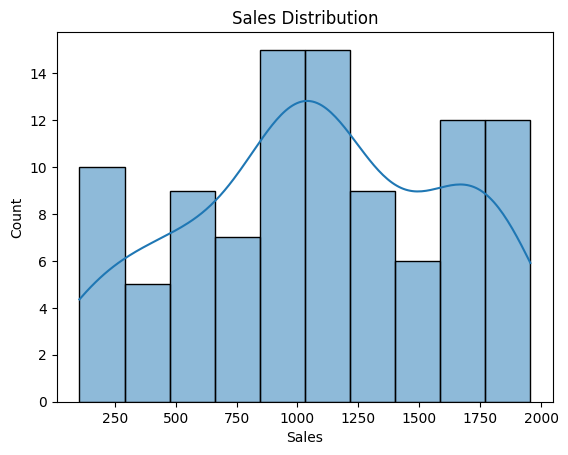

In [8]:
#Histogram
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Sales'], bins=10, kde=True)
plt.title("Sales Distribution")
plt.show()

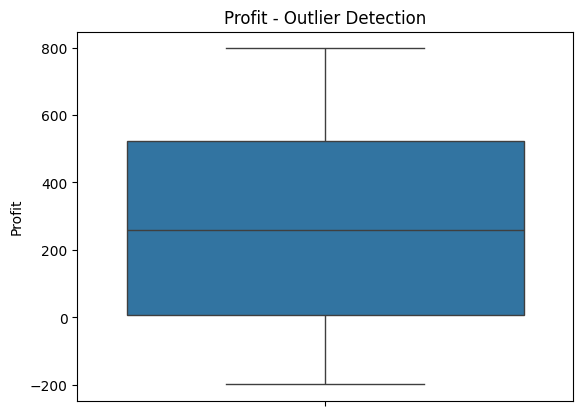

In [9]:
#Boxplot

sns.boxplot(y=df['Profit'])
plt.title("Profit - Outlier Detection")
plt.show()

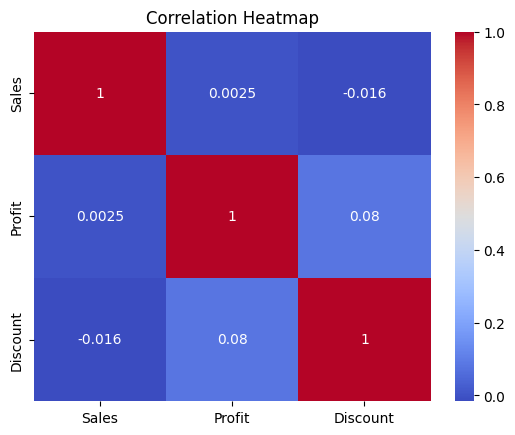

In [10]:
#Heatmap

sns.heatmap(df[['Sales', 'Profit', 'Discount']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [11]:
#project2
import numpy as np
import pandas as pd
data = {
    "Product": ["Laptop", "Mouse", "Chair", "Phone", "Pen"] * 20,
    "Region": np.random.choice(["North", "South", "East", "West"], 100),
    "Sales": np.random.randint(100, 2000, 100),
    "Profit": np.random.randint(-200, 800, 100),
    "Discount": np.random.uniform(0.0, 0.5, 100).round(2),
    "Category": np.random.choice(["Technology", "Office Supplies", "Furniture"], 100),
    "Date": pd.date_range(start="2023-01-01", periods=100)
}

df = pd.DataFrame(data)
df.head()

,Product,Region,Sales,Profit,Discount,Category,Date
0,Laptop,West,762,240,0.30,Furniture,2023-01-01
1,Mouse,East,1531,74,0.10,Office Supplies,2023-01-02
2,Chair,North,1098,705,0.18,Furniture,2023-01-03
3,Phone,North,1711,595,0.20,Furniture,2023-01-04
4,Pen,West,335,172,0.38,Office Supplies,2023-01-05


In [12]:
# Check info and missing values
print("info and missing values:")
print(df.info())
print(df.isnull().sum())

info and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Product   100 non-null    object        
 1   Region    100 non-null    object        
 2   Sales     100 non-null    int32         
 3   Profit    100 non-null    int32         
 4   Discount  100 non-null    float64       
 5   Category  100 non-null    object        
 6   Date      100 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int32(2), object(3)
memory usage: 4.8+ KB
None
Product     0
Region      0
Sales       0
Profit      0
Discount    0
Category    0
Date        0
dtype: int64


In [13]:
# Remove duplicates if any
df = df.drop_duplicates()

In [14]:
# Confirm Date is datetime
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
# Summary statistics
print(df.describe())

             Sales      Profit    Discount                 Date
count   100.000000  100.000000  100.000000                  100
mean   1039.560000  326.910000    0.244000  2023-02-19 12:00:00
min     160.000000 -182.000000    0.000000  2023-01-01 00:00:00
25%     595.750000   88.250000    0.117500  2023-01-25 18:00:00
50%    1025.000000  325.500000    0.235000  2023-02-19 12:00:00
75%    1441.500000  579.750000    0.360000  2023-03-16 06:00:00
max    1997.000000  794.000000    0.500000  2023-04-10 00:00:00
std     514.722154  290.443447    0.147011                  NaN


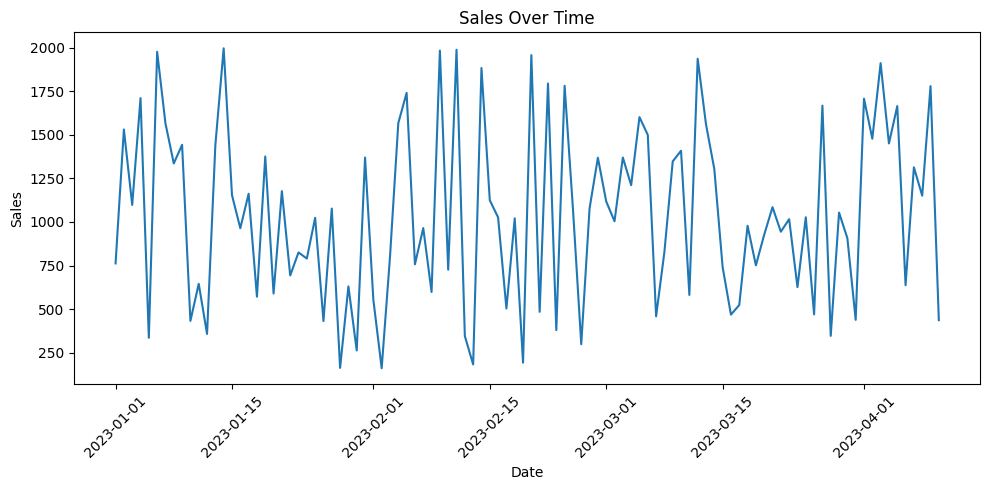

In [16]:
# Trend of Sales over time
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.lineplot(x='Date', y='Sales', data=df)
plt.title("Sales Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

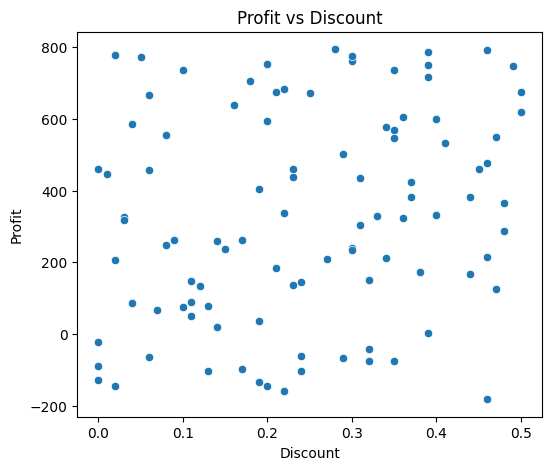

In [17]:
# Profit vs Discount
plt.figure(figsize=(6,5))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title("Profit vs Discount")
plt.show()

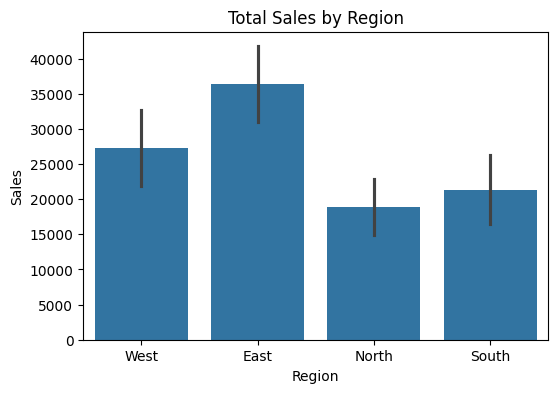

In [18]:
# Sales by Region
plt.figure(figsize=(6,4))
sns.barplot(x='Region', y='Sales', data=df, estimator=np.sum)
plt.title("Total Sales by Region")
plt.show()

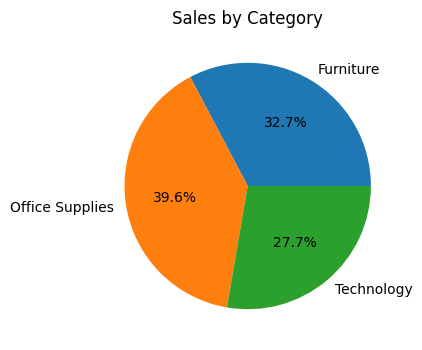

In [19]:
# Sales by Category
plt.figure(figsize=(6,4))
df.groupby("Category")['Sales'].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title("Sales by Category")
plt.ylabel("")
plt.show()

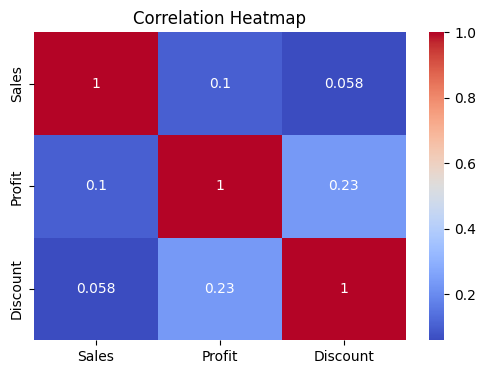

In [20]:
# Heatmap of correlations
plt.figure(figsize=(6,4))
sns.heatmap(df[['Sales', 'Profit', 'Discount']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [21]:
# Features and target
import seaborn as sns
X = df[['Profit', 'Discount']]
y = df['Sales']

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Split data
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 Score: -0.0035582421086770566
MSE: 246364.67698281995
